## Open port   COM5 with 115200 None parity bit and 1 stopbit

In [1]:
import serial 
ser = serial.Serial('COM5') #'dev/ttyUSB0' if linux
print(ser.name)
ser.write(b'A') # write a string
ser.close()

COM5


## Open named port at 115200 baud rate bytesize = 8 None parity bit and 1 stopbit, timeout  = 1s

### read one byte

1 int = 2 bytes

1 float = 1 double = 4 bytes

    void setup(){
      Serial.begin(115200);
      }

     void loop(){
      delay(100);
      Serial.write(1);
      }
      
#### b'\x02' meaning 1 byte HEX type

In [107]:
with serial.Serial('COM5',115200,timeout = 1) as ser:
    x = ser.read()
    
# auto close connection
print(x)

b'\x02'


### read n bytes

This function will read until n leght byte and return it

    void setup(){
      Serial.begin(115200);
      }

     void loop(){
      int a= 1;
      send2byte(&a);
      delay(100);
      }

    void send2byte(int* data1){
      byte* bytedata1 = (byte*)(data1);
      byte buf[2]= { bytedata1[0],bytedata1[1] };
      Serial.write(buf,2);
      }

In [139]:
with serial.Serial('COM5',115200,timeout = 1) as ser:
    x = ser.read(1) # read one byte
print(x)

b'A'


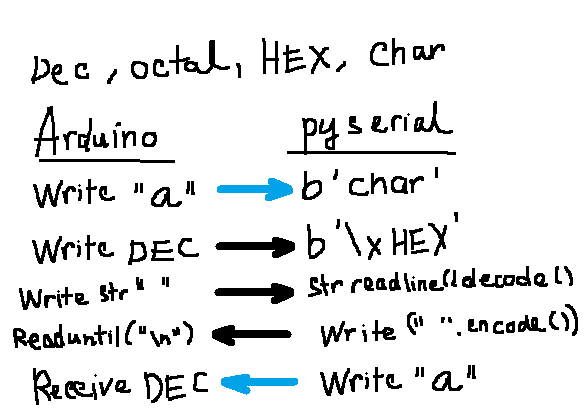

    Serial.write("a")   = b'a'
    Serial.write("ab")  = b'a'    # one byte
    Serial.write("ab")  = b'ab'   # two bytes decode "ab"
    Serial.write(2)     = b'\x02' # return

## read a '\n' terminated line

    void setup(){
      Serial.begin(115200);
      }

     void loop(){
      // int a= 2;
      // send2byte(&a);
      Serial.write(65);
      Serial.write(10); // 10 = \n
      delay(100);
      }

In [145]:
with serial.Serial('COM5',115200,timeout = 1) as ser:
    l = ser.readline() # read a '\n' terminated line
print(l)

b'A\n'


## Open named port 38400,8,E,1 non blocking HW handshaking

In [ ]:
ser = serial.Serial('COM5',38400, timeout = 0, parity = serial.PARITY_EVEN, rtscts = 1)

s = ser.read(100)

## Configuring ports later

In [146]:
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM5'
print(ser)

Serial<id=0x4e10370, open=False>(port='COM5', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)


In [150]:
# open port
ser.open()
ser.is_open

True

In [10]:
# close port
ser.close()
ser.is_open

False

    void setup(){
      Serial.begin(115200);
      pinMode(LED_BUILTIN,OUTPUT);
      digitalWrite(LED_BUILTIN,HIGH);
      }

     void loop(){
      char a = 'x';

      if(Serial.available()){
        a = Serial.read();
        if( a == 'A'){
          digitalWrite(LED_BUILTIN,LOW);
          delay(1000);
          digitalWrite(LED_BUILTIN,HIGH);
          }
        }
      }


    char myChar = 'A';
    char myChar = 65;      // both are equivalent

In [12]:
# ser.write(str.encode('allon'))
# ser.write(b'\x0101')

a = 'A'
with serial.Serial() as ser:
    ser.baudrate = 115200
    ser.port = 'COM5'
    ser.open()
    ser.write(a.encode())
    print(a)
    ser.close()

A


    void setup(){
      Serial.begin(115200);
      pinMode(LED_BUILTIN,OUTPUT);
      digitalWrite(LED_BUILTIN,HIGH);
      }

     void loop(){
      String a = "Hello String";

      if(Serial.available()){
        a = Serial.read();
        if( a == "hello"){
          digitalWrite(LED_BUILTIN,LOW);
          delay(1000);
          digitalWrite(LED_BUILTIN,HIGH);
          }
        }
      }

In [192]:
# Assuming that text is a bytes object, just use text.decode('utf-8')
# unicode of Python2 is equivalent to str in Python3, so you can also write:

with serial.Serial() as ser:
    ser.baudrate = 115200
    ser.port  = 'COM5'
    ser.open()
    ser.write(str.encode("hello"))  #ser.write(b'hello') ser.write(str.encode("hello"))
    ser.close()

    String InBytes;

    void setup(){
      Serial.begin(115200);
      pinMode(LED_BUILTIN,OUTPUT);
      digitalWrite(LED_BUILTIN,HIGH);
      }

    void loop(){
      if (Serial.available()>0){
        InBytes = Serial.readStringUntil('\n');
        if (InBytes == "on"){
          digitalWrite(LED_BUILTIN,LOW);
          Serial.write("Led on");
          }
        if (InBytes == "off"){
          digitalWrite(LED_BUILTIN,HIGH);
          Serial.write("Led off");
          }
        else{
          Serial.write("Invalid input");
          }
        }
      }


In [19]:
import serial
import time
ser = serial.Serial('COM5',115200)
ser.timeout = 1

while True:
    i = input("input(on/off): ")
    print(i)
    if i == "done":
        print("finished program")
        break
    ser.write(i.encode())
    time.sleep(0.5)
    print(ser.readline().decode()) # ser.realine().decode('ascii')
    
ser.close()

input(on/off): on
on
Led onInvalid input
input(on/off): off
off
Led off
input(on/off): on
on
Led onInvalid input
input(on/off): on
on
Led onInvalid input
input(on/off): done
done
finished program


## EOL

In [190]:
import serial
import io

a = str.encode("hello")
ser = serial.serial_for_url('loop://',timeout = 1)
sio = io.TextIOWrapper(io.BufferedRWPair(ser,ser))

sio.write("hello")
sio.flush() # it is the buffering, required to get the data out
hello = sio.readline()
print(hello == a)

False


## Testing ports

### Listing ports

In [194]:
serial.tools.list_ports

AttributeError: module 'serial' has no attribute 'tools'

### Accessing ports

In [197]:
serial.tools.miniterm

AttributeError: module 'serial' has no attribute 'tools'

In [4]:
l = [1,4,6,8]
print(type(l[0]))

a = str(l)

print(a)
print(type(a[0]))

<class 'int'>
[1, 4, 6, 8]
<class 'str'>


In short, the bytes type is a sequence of bytes that have been encoded and are ready to be stored in memory/disk. There are many types of encodings (utf-8, utf-16, windows-1255), which all handle the bytes differently. The bytes object can be decoded into a str type.

The str type is a sequence of unicode characters. The str needs to be encoded to be stored, but is mutable and an abstraction of the bytes logic.

There is a strong relationship between str and bytes. bytes can be decoded into a str, and strs can be encoded into bytes.

In [40]:
a= b'\xAA'
print(type(a))

<class 'bytes'>


In [52]:
a= b'\x7F'
print("decode ascii: ",a.decode("ascii"))
print("decode utf-8 ",a.decode("utf-8"))

decode ascii:  
decode utf-8  


In [53]:
a = b'\x02\xA2'
print(type(a))
print(a.decode("ascii"))

<class 'bytes'>


UnicodeDecodeError: 'ascii' codec can't decode byte 0xa2 in position 1: ordinal not in range(128)

    float a = 0;
    float b = 0;

    void setup() {
      // put your setup code here, to run once:
      Serial.begin(115200);
    }

    void loop() {
      // put your main code here, to run repeatedly:
      a ++;
      b = a +1;
      Serial.print(a);
      Serial.print("x");
      Serial.println(b);
      delay(100);
    }

In [1]:
import serial

ser = serial.Serial("COM5",115200,timeout = 1)
print(ser)

# readline to data
data = ser.readline()

# decode bytes to string
data = ser.readline().decode()

#split the string into list
l = data.split('x')

# turn into float number
real_data = []
for i in l:
    i = i.replace('\r\n','')
    real_data.append(float(i))
    
print(real_data)
ser.close()


Serial<id=0x4dbbfd0, open=True>(port='COM5', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)
[114.0, 115.0]


In [ ]:
ser.close()

    float a = 0;
    float b = 0;

    void setup() {
      // put your setup code here, to run once:
      Serial.begin(115200);
    }

    void loop() {
      // put your main code here, to run repeatedly:
      a = 1;
      b = a +1;
      sendtoPC(&a,&b);
      Serial.println();
    //  Serial.print(a);
    //  Serial.print("x");
    //  Serial.println(b);
       //delay(1000);
    }

    void sendtoPC(float* data1, float* data2){
      byte* bytedata1 = (byte*)(data1);
      byte* bytedata2 = (byte*)(data2);
      byte buf[4] = {bytedata1[0],bytedata1[1],
                      bytedata2[0],bytedata2[1]};
      }

In [41]:
dataNumBytes = 4
numParams = 1

a = bytearray(numParams * dataNumBytes)

print(a)

bytearray(b'\x00\x00\x00\x00')


In [42]:
import serial

ser = serial.Serial("COM5",115200);

data = ser.read(8)

print(data)

ser.close()

b'\n\r\n\r\n\r\n\r'


## list ports

python -m serial.tools.list_ports -v

## serial.tools.miniterm

-m  serial.tools.miniterm -h

## serial_for_url()

    • rfc2217://<host>:<port>[?<option>[&<option>...]]
    • socket://<host>:<port>[?logging={debug|info|warning|error}]
    • loop://[?logging={debug|info|warning|error}]
    • hwgrep://<regexp>[&skip_busy][&n=N]
    • spy://port[?option[=value][&option[=value]]]
    • alt://port?class=<classname>
    
    • rfc2217://localhost:7000
    • rfc2217://localhost:7000?poll_modem
    • rfc2217://localhost:7000?ign_set_control&timeout=5.5
    • socket://localhost:7777
    • loop://?logging=debug
    • hwgrep://0451:f432 (USB VID:PID)
    • spy://COM54?file=log.txt
    • alt:///dev/ttyUSB0?class=PosixPollSerial

In [3]:
import serial
with serial.serial_for_url('spy:///COM5?file=test.txt', timeout=1) as s:
    s.dtr = False
    s.write(str.encode('hello world'))
    s.read(20)
    s.dtr = True
    s.write(serial.to_bytes(range(256)))
    s.read(400)
    s.send_break()
with open('test.txt') as f:
    print(f.read())


000000.002 DTR  inactive
000000.002 TX   0000  68 65 6C 6C 6F 20 77 6F  72 6C 64                 hello world     
000001.004 DTR  active
000001.004 TX   0000  00 01 02 03 04 05 06 07  08 09 0A 0B 0C 0D 0E 0F  ................
000001.005 TX   0010  10 11 12 13 14 15 16 17  18 19 1A 1B 1C 1D 1E 1F  ................
000001.005 TX   0020  20 21 22 23 24 25 26 27  28 29 2A 2B 2C 2D 2E 2F   !"#$%&'()*+,-./
000001.005 TX   0030  30 31 32 33 34 35 36 37  38 39 3A 3B 3C 3D 3E 3F  0123456789:;<=>?
000001.005 TX   0040  40 41 42 43 44 45 46 47  48 49 4A 4B 4C 4D 4E 4F  @ABCDEFGHIJKLMNO
000001.005 TX   0050  50 51 52 53 54 55 56 57  58 59 5A 5B 5C 5D 5E 5F  PQRSTUVWXYZ[\]^_
000001.006 TX   0060  60 61 62 63 64 65 66 67  68 69 6A 6B 6C 6D 6E 6F  `abcdefghijklmno
000001.006 TX   0070  70 71 72 73 74 75 76 77  78 79 7A 7B 7C 7D 7E 7F  pqrstuvwxyz{|}~.
000001.006 TX   0080  80 81 82 83 84 85 86 87  88 89 8A 8B 8C 8D 8E 8F  ................
000001.006 TX   0090  90 91 92 93 94 95 96 97  98 99 9A 9B 9C 